In [1]:
import tensorflow as tf
import scipy
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.optimizers import Adam

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

x = base_model.output
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(11, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 
)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/ADMIN/Desktop/dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use training subset
)

validation_generator = train_datagen.flow_from_directory(
    'C:/Users/ADMIN/Desktop/dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)

Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

test_datagen = ImageDataGenerator(
    rescale=1./255  
)

Epoch 1/10
171/171 [==============================] - 297s 2s/step - loss: 1.2107 - accuracy: 0.6264 - val_loss: 0.8380 - val_accuracy: 0.7180
Epoch 2/10
171/171 [==============================] - 214s 1s/step - loss: 0.6453 - accuracy: 0.7634 - val_loss: 0.7075 - val_accuracy: 0.7589
Epoch 3/10
171/171 [==============================] - 226s 1s/step - loss: 0.5157 - accuracy: 0.8147 - val_loss: 0.6460 - val_accuracy: 0.7716
Epoch 4/10
171/171 [==============================] - 230s 1s/step - loss: 0.4773 - accuracy: 0.8306 - val_loss: 0.6468 - val_accuracy: 0.7716
Epoch 5/10
171/171 [==============================] - 213s 1s/step - loss: 0.4155 - accuracy: 0.8531 - val_loss: 0.6650 - val_accuracy: 0.7894
Epoch 6/10
171/171 [==============================] - 213s 1s/step - loss: 0.3739 - accuracy: 0.8727 - val_loss: 0.6359 - val_accuracy: 0.8118
Epoch 7/10
171/171 [==============================] - 213s 1s/step - loss: 0.3446 - accuracy: 0.8769 - val_loss: 0.6513 - val_accuracy: 0.8110

# Tester

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image
import io

In [6]:
def load_and_preprocess_image(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    img = img.resize((224, 224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

In [10]:
image_dictionary = {
    0:"Dew",
    1:"Fogsmog",
    2:"Frost",
    3:"Glaze",
    4:"Hail",
    5:"Lightening",
    6:"Rain",
    7:"Rainbow",
    8:"Rime",
    9:"Sandstorm",
    10:"Snow"
}

In [11]:
# Example URLs
image_urls = [
    'https://www.thoughtco.com/thmb/6HUU6IVtCE97gtWVaMg3f2wgOEI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/getty_lightening_lightning-485210623-58b9a05e5f9b58af5c794929.jpg',
    'https://www.livemint.com/lm-img/img/2024/04/22/1600x900/Extreme-rainfall-events-quadrupled-over-western-Me_1713057045323_1713749094408.jpg',
    'https://media.hswstatic.com/eyJidWNrZXQiOiJjb250ZW50Lmhzd3N0YXRpYy5jb20iLCJrZXkiOiJnaWZcL2dldHR5aW1hZ2VzLTE0NDA1NjMyNTAuanBnIiwiZWRpdHMiOnsicmVzaXplIjp7IndpZHRoIjo4Mjh9fX0=',
    'https://nsidc.org/sites/default/files/images/After%20a%20snow%20storm%2C%20the%20sun%20emerged%20revealing%20this%20beautiful%20scene%20on%20Cedar%20River%20Road%20west%20of%20Mount%20Vernon%2C%20IA..jpg',
    'https://qph.cf2.quoracdn.net/main-qimg-6407a89cefb12aeaf614b7b3905b2564-lq',
]

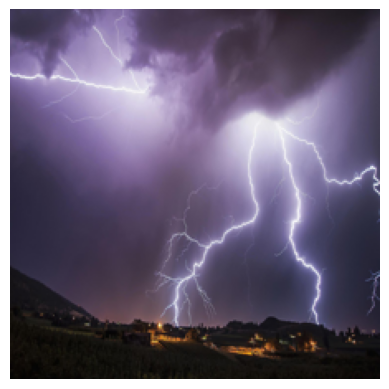

1/1 [==============================] - 0s 50ms/step
Predicted Class: Lightening, Image: https://www.thoughtco.com/thmb/6HUU6IVtCE97gtWVaMg3f2wgOEI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/getty_lightening_lightning-485210623-58b9a05e5f9b58af5c794929.jpg


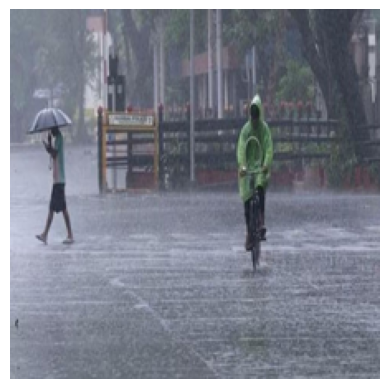

1/1 [==============================] - 0s 55ms/step
Predicted Class: Rain, Image: https://www.livemint.com/lm-img/img/2024/04/22/1600x900/Extreme-rainfall-events-quadrupled-over-western-Me_1713057045323_1713749094408.jpg


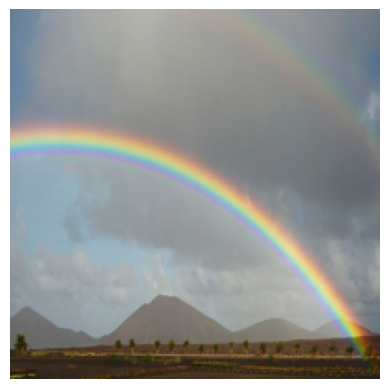

1/1 [==============================] - 0s 50ms/step
Predicted Class: Rainbow, Image: https://media.hswstatic.com/eyJidWNrZXQiOiJjb250ZW50Lmhzd3N0YXRpYy5jb20iLCJrZXkiOiJnaWZcL2dldHR5aW1hZ2VzLTE0NDA1NjMyNTAuanBnIiwiZWRpdHMiOnsicmVzaXplIjp7IndpZHRoIjo4Mjh9fX0=


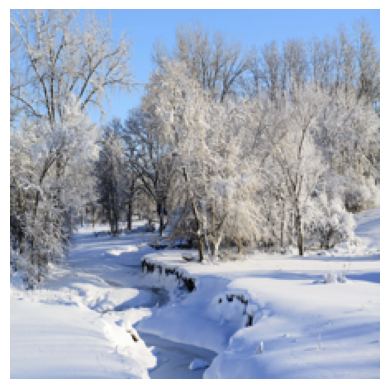

1/1 [==============================] - 0s 51ms/step
Predicted Class: Snow, Image: https://nsidc.org/sites/default/files/images/After%20a%20snow%20storm%2C%20the%20sun%20emerged%20revealing%20this%20beautiful%20scene%20on%20Cedar%20River%20Road%20west%20of%20Mount%20Vernon%2C%20IA..jpg


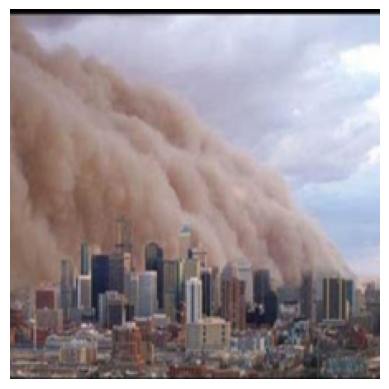

1/1 [==============================] - 0s 52ms/step
Predicted Class: Sandstorm, Image: https://qph.cf2.quoracdn.net/main-qimg-6407a89cefb12aeaf614b7b3905b2564-lq


In [12]:
for url in image_urls:
    # Preprocess image
    img = load_and_preprocess_image(url)

    # Plot image
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()

    # Make prediction
    prediction = model.predict(img)
    # Get the predicted class
    predicted_class = np.argmax(prediction)
    print(f"Predicted Class: {image_dictionary[predicted_class]}, Image: {url}")